## Universidad Autonoma de Nuevo León
## Facultad de Ciencias Físico Matemáticas
### Maestría en Ciencia de Datos
### Aprendizaje Automático
#### Eduardo David González Flores
##### 1515489

## Tarea (8 puntos)
- Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
- Elegir alguna métrica para determinar número de grupos, usarla y discutirla
- Busca alguna revista científica que publique trabajos relacionados con el tuyo
- Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

In [4]:
import pandas as pd

file_path = '../data/churn_dummy.csv'

df = pd.read_csv(file_path)
df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [9]:
from joblib import Parallel, delayed

range_clusters = range(2, 20, 1)

def calculate_metrics(k, df):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    
    inertia = kmeans.inertia_
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    
    return k, inertia, silhouette_avg

results = Parallel(n_jobs=-1)(delayed(calculate_metrics)(k, df) for k in range_clusters)

Cantidad óptima de clusters según la métrica silhouette: 8


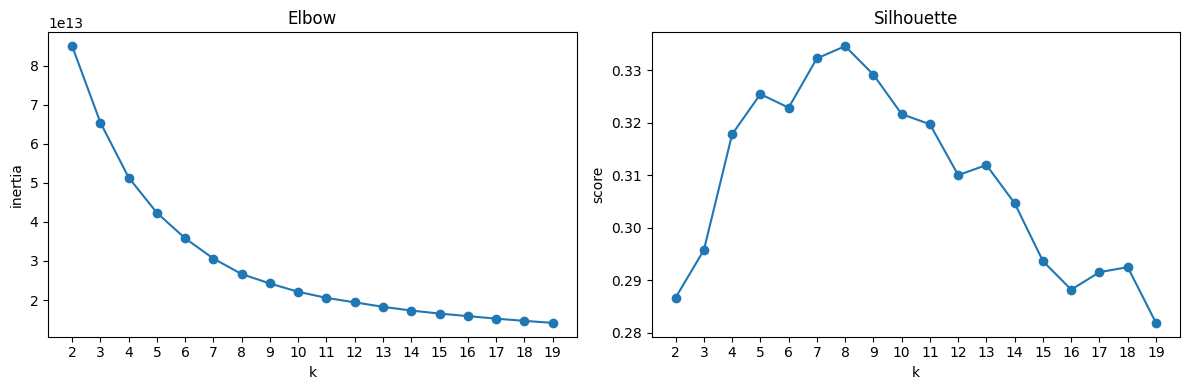

In [21]:
ks, inertia_values, silhouette_scores = zip(*results)

best_cluster_silhouette = ks[silhouette_scores.index(max(silhouette_scores))]
print(f"Cantidad óptima de clusters según la métrica silhouette: {best_cluster_silhouette}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xticks(range_clusters)
plt.plot(ks, inertia_values, marker='o')
plt.title('Elbow')
plt.xlabel('k')
plt.ylabel('inertia')

plt.subplot(1, 2, 2)
plt.xticks(range_clusters)
plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette')
plt.xlabel('k')
plt.ylabel('score')

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=best_cluster_silhouette)
kmeans.fit(df)

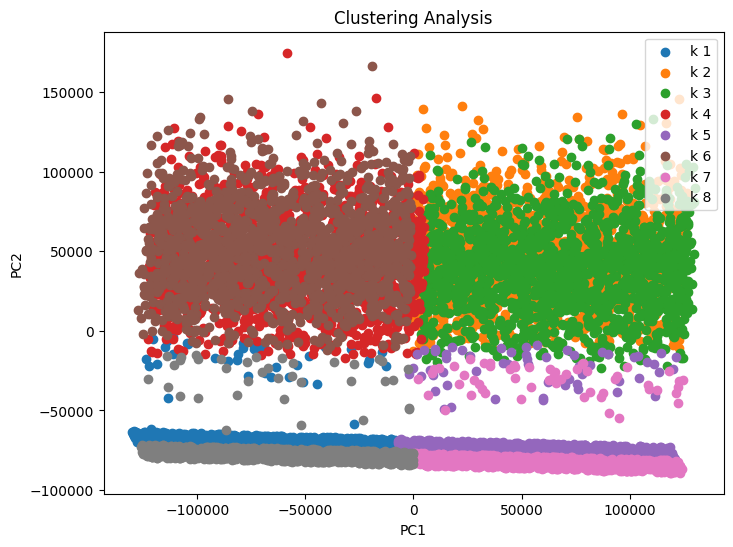

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)

df_2d = pd.DataFrame(df_2d, columns=['PC1', 'PC2'])
df_2d['k'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(best_cluster_silhouette):
    cluster_data = df_2d[df_2d['k'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'k {cluster + 1}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Analysis')
plt.legend()
plt.show()


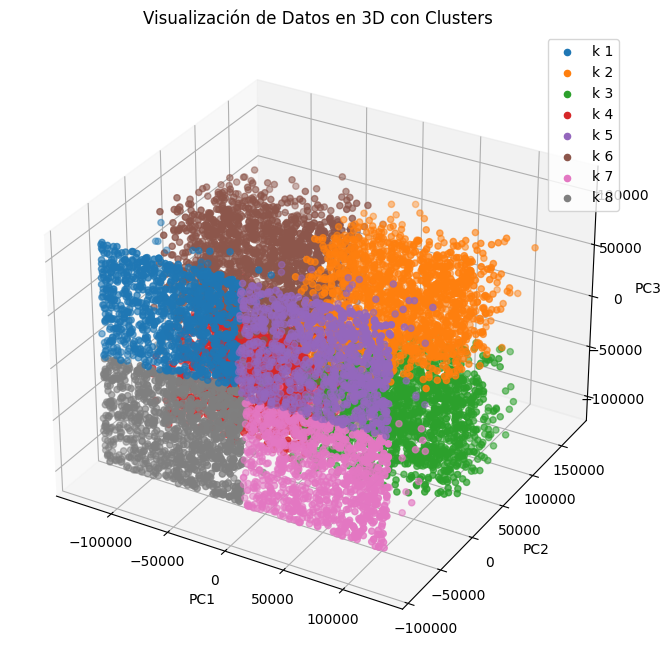

In [24]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
df_3d = pca.fit_transform(df)

df_3d = pd.DataFrame(df_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['k'] = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(best_cluster_silhouette):
    cluster_data = df_3d[df_3d['k'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'k {cluster + 1}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clustering Analysis')
plt.legend()
plt.show()
